# Visualization of suicide rates across nations

This notebook is used to find signals corelated to increased/descreased suicide rates globally across nations of different socio-economic spectrum .

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [140]:
df=pd.read_csv('master.csv')

In [141]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [142]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [143]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [96]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [97]:
df=df.dropna(axis=1)

In [98]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [99]:
cols=['country','year','sex','age','suicides/100k pop']

In [100]:
first_obs=df[cols]

In [101]:
first_obs.head()

,country,year,sex,age,suicides/100k pop
0,Albania,1987,male,15-24 years,6.71
1,Albania,1987,male,35-54 years,5.19
2,Albania,1987,female,15-24 years,4.83
3,Albania,1987,male,75+ years,4.59
4,Albania,1987,male,25-34 years,3.28


Modifying the year attribute

In [102]:
print("Min :", first_obs.year.min())
print("Max :", first_obs.year.max())

Min : 1985
Max : 2016


In [103]:
len(first_obs.year.unique())

32

Each year is mapped into one decade so as to have 3 such decades overall for our analysis.

In [104]:
def decade_mapping(data):
    if 1987<= data <= 1996:
        return "1987-1996"
    elif 1997<= data <= 2006:
        return "1997-2006"
    else:
        return "2007-2016"
first_obs.year = first_obs.year.apply(decade_mapping)

In [105]:
first_obs.sample()

,country,year,sex,age,suicides/100k pop
6334,Costa Rica,2007-2016,male,15-24 years,13.83


Suicides based on age and gender

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

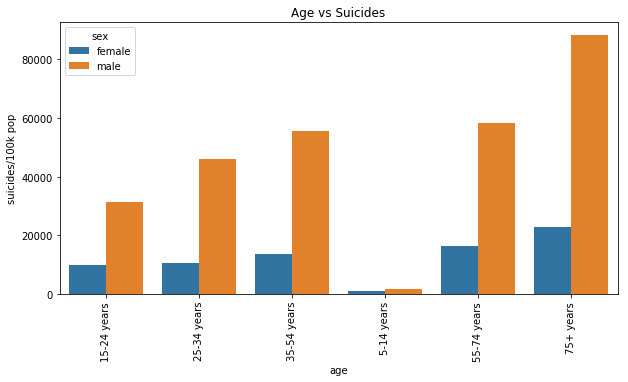

In [107]:
plt.figure(figsize=(10,5))
sns.barplot(x='age',y='suicides/100k pop',hue='sex',data=first_obs.groupby(['age','sex']).sum().reset_index())
plt.title("Age vs Suicides")
plt.xticks(rotation=90)


In [108]:
first_obs.groupby(['year','sex']).sum().reset_index()

,year,sex,suicides/100k pop
0,1987-1996,female,23483.82
1,1987-1996,male,81376.54
2,1997-2006,female,27593.97
3,1997-2006,male,108280.25
4,2007-2016,female,23936.98
5,2007-2016,male,91872.27


Suicides based on Decades,Gender

Text(0.5,1,'Decades vs Suicides')

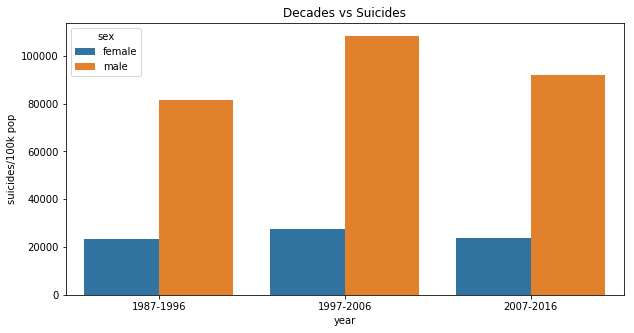

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(x='year',y='suicides/100k pop',hue='sex',data=first_obs.groupby(['year','sex']).sum().reset_index())
plt.title('Decades vs Suicides')

Decadewise distribution of suicides for both the genders. It can be seen that 1997-2006 has higher number of suicides.

Text(0.5,1,'Genderwise suicide')

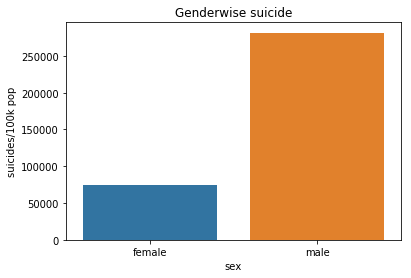

In [110]:
sns.barplot(x='sex',y='suicides/100k pop',data=first_obs.groupby('sex').sum().reset_index())
plt.title('Genderwise suicide')

Male suicides are higher then female suicides.

In [115]:
countrywise=first_obs.groupby('country').sum().reset_index()
countrywise.head()

,country,suicides/100k pop
0,Albania,924.76
1,Antigua and Barbuda,179.14
2,Argentina,3894.59
3,Armenia,976.21
4,Aruba,1596.52


In [114]:
countrywise.columns

Index(['suicides/100k pop'], dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

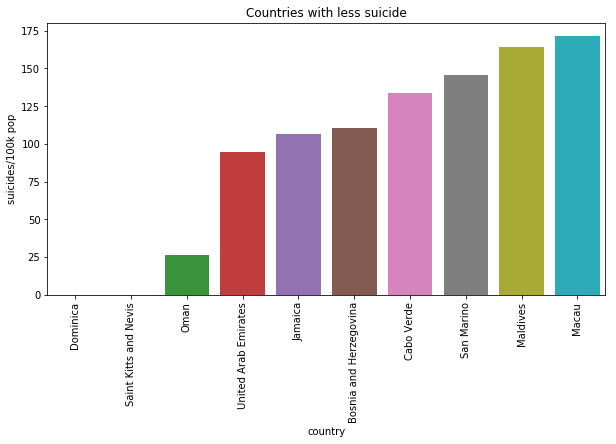

In [117]:
plt.figure(figsize=(10,5))
best_10=countrywise.sort_values(by='suicides/100k pop',ascending=True)[:10]
sns.barplot(x='country',y='suicides/100k pop',data=best_10)
plt.title('Countries with less suicide')
plt.xticks(rotation=90)

Top 10 countries with most suicides

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

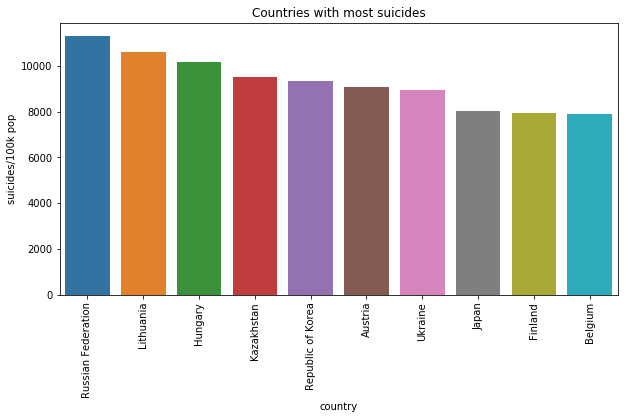

In [119]:
plt.figure(figsize=(10,5))
top_10=countrywise.sort_values(by='suicides/100k pop',ascending=False)[:10]
sns.barplot(x='country',y='suicides/100k pop',data=top_10)
plt.title('Countries with most suicides')
plt.xticks(rotation=90)


Countries with most/less suicides in the decade 2007-2016

In [124]:
recent=first_obs[first_obs.year=='2007-2016'].groupby('country').sum().reset_index()
recent.head()

,country,suicides/100k pop
0,Albania,178.56
1,Antigua and Barbuda,23.60
2,Argentina,1294.98
3,Armenia,378.16
4,Aruba,327.93


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

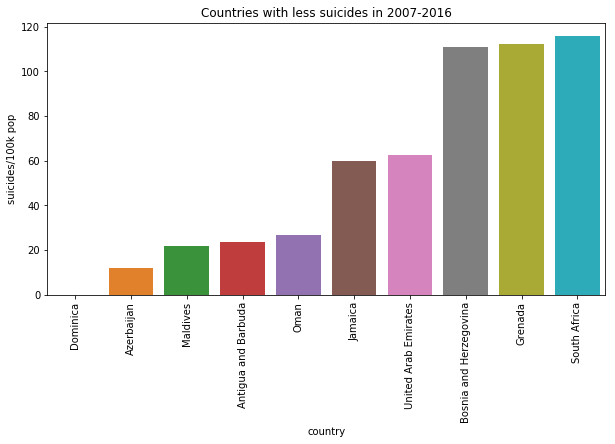

In [125]:
plt.figure(figsize=(10,5))
recent_best_10=recent.sort_values(by='suicides/100k pop')[:10]
sns.barplot(x='country',y='suicides/100k pop',data=recent_best_10)
plt.title('Countries with less suicides in 2007-2016')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

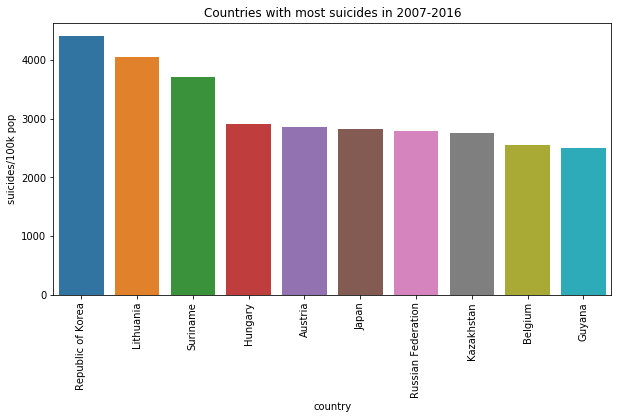

In [127]:
plt.figure(figsize=(10,5))
recent_worst_10=recent.sort_values(by='suicides/100k pop',ascending=False)[:10]
sns.barplot(x='country',y='suicides/100k pop',data=recent_worst_10)
plt.title('Countries with most suicides in 2007-2016')
plt.xticks(rotation=90)


Now we shall identify those nations where the suicide rate is increasing/decreasing for the past 3 decades and classify them as danger zones or safe zones respectively.

In [128]:
zones=first_obs.groupby(['country','year']).sum().reset_index()
zones.head()

,country,year,suicides/100k pop
0,Albania,1987-1996,264.62
1,Albania,1997-2006,481.58
2,Albania,2007-2016,178.56
3,Antigua and Barbuda,1987-1996,32.24
4,Antigua and Barbuda,1997-2006,123.30


In [132]:
three_gen=zones.country.value_counts().reset_index(name='count')
three_gen.columns=['country','counts']
three_gen_countries=three_gen[three_gen.counts==3].country.tolist()

In [136]:
nations=three_gen_countries
years=zones.year.unique()
safe_zones=[]
danger_zones=[]
for country in nations:
    year1_count=float(zones[(zones.country==country) & (zones.year=='1987-1996')]['suicides/100k pop'])
    year2_count=float(zones[(zones.country==country) & (zones.year=='1997-2006')]['suicides/100k pop'])
    year3_count=float(zones[(zones.country==country) & (zones.year=='2007-2016')]['suicides/100k pop'])
    if year1_count<=year2_count<=year3_count:
        danger_zones.append(country)
    if year1_count>=year2_count>=year3_count:
        safe_zones.append(country)
    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

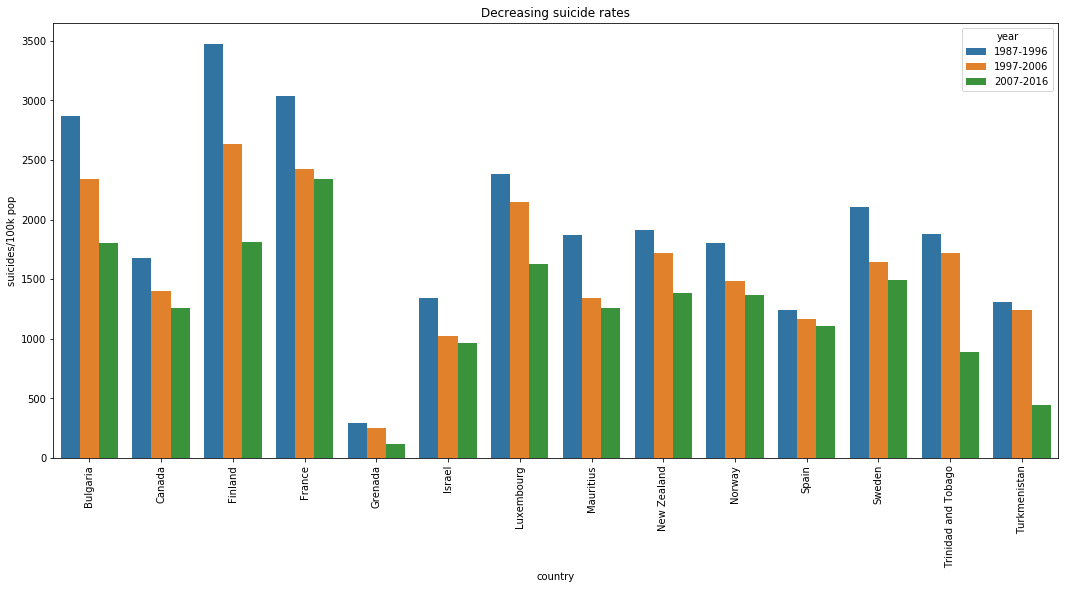

In [137]:
plt.figure(figsize=(18,8))
sns.barplot(x='country',y='suicides/100k pop',hue='year',data=zones[zones.country.isin(safe_zones)])
plt.title('Decreasing suicide rates')
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

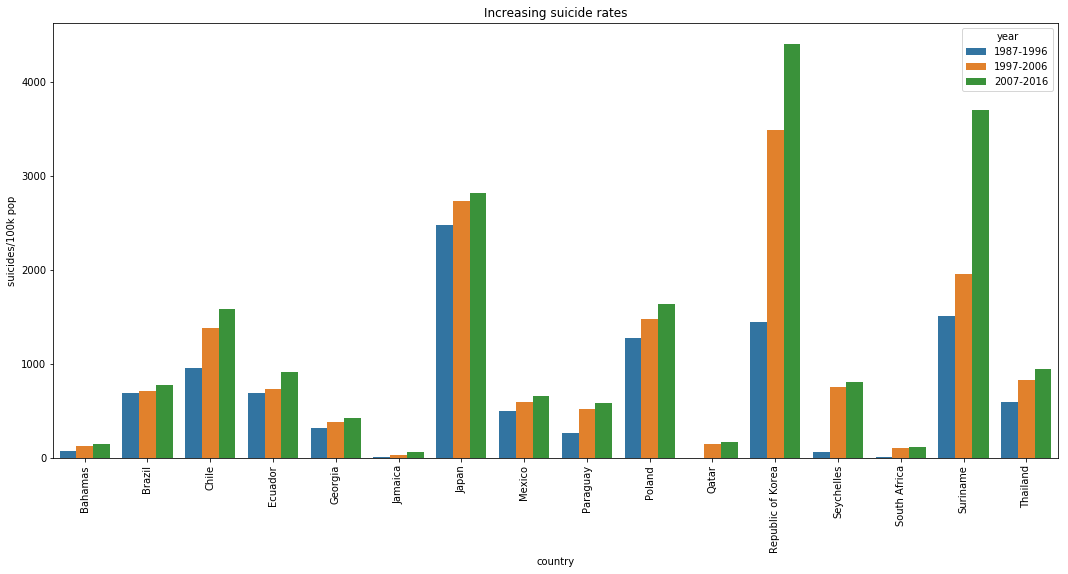

In [138]:
plt.figure(figsize=(18,8))
sns.barplot(x='country',y='suicides/100k pop',hue='year',data=zones[zones.country.isin(danger_zones)])
plt.title('Increasing suicide rates')
plt.xticks(rotation=90)